# Проект e-commerce

## Описание проекта

Продакт-менеджер Василий попросил проанализировать совершенные покупки и ответить на следующие вопросы:

1. Сколько у нас пользователей, которые совершили покупку только один раз?

2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

3. По каждому товару определить, в какой день недели товар чаще всего покупается.

4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? 

5. Выполнить когортный анализ пользователей. В период с января по декабрь выявить когорту с самым высоким retention на 3-й месяц. 

6. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию.


## Загрузка данных из файла в датафрейм и изучение общей информации

Импортируем все необходимые библиотеки.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Откроем файл с данными и выведем на экран первые 10 строчек датафрейма olist_customers_dataset.

In [2]:
olist_customers_dataset = pd.read_csv\
                          ('olist_customers_dataset.csv')
olist_customers_dataset.head(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG


Откроем файл с данными и выведем на экран первые 10 строчек датафрейма olist_order_items_dataset.

In [3]:
olist_order_items_dataset = pd.read_csv\
                          ('olist_order_items_dataset.csv')
olist_order_items_dataset.head(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40


Откроем файл с данными и выведем на экран первые 10 строчек датафрейма olist_orders_dataset.

In [4]:
olist_orders_dataset = pd.read_csv\
                          ('olist_orders_dataset.csv')
olist_orders_dataset.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00


### Общая информация

Посмотрим общие данные, выведя основную информацию о датафрейме olist_customers_dataset с помощью метода info().

In [5]:
olist_customers_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Датафрейм olist_customers_dataset содержит 5 колонок и 99441 строку. Пропусков в данных нет.

Посмотрим общие данные, выведя основную информацию о датафрейме olist_order_items_dataset с помощью метода info().

In [6]:
olist_order_items_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Датафрейм olist_order_items_dataset содержит 7 колонок и 112650 строк. Пропусков в данных нет.

Посмотрим общие данные, выведя основную информацию о датафрейме olist_orders_dataset с помощью метода info().

In [7]:
olist_orders_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Датафрейм olist_orders_dataset содержит 8 колонок и 99441 строку. В данных есть пропуски, в столбцах order_approved_at, order_delivered_carrier_date, order_delivered_customer_date.

Посчитаем количество пропусков в столбцах order_approved_at, order_delivered_carrier_date, order_delivered_customer_date.

In [8]:
olist_orders_dataset.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Больше всего пропусков в столбце order_delivered_customer_date, и составляют они примерно 3%. Возможно пропуски присутствуют здесь из-за того, что данные заказы были отменены, либо еще не были переданы в службу доставки, либо еще не оплачены, так как пропуски встречаются в столбцах время подтверждения оплаты заказа, время передачи заказа в логистическую службу, время доставки заказа. 

### Замена типа данных

Заменем тип данных в столбцах order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date датафрейма olist_orders_dataset с object на datetime.  

In [9]:
olist_orders_dataset[['order_purchase_timestamp', 'order_approved_at', \
                      'order_delivered_carrier_date', 'order_delivered_customer_date', \
                      'order_estimated_delivery_date']] = olist_orders_dataset[['order_purchase_timestamp', \
                                                                                'order_approved_at', \
                                                                                'order_delivered_carrier_date', \
                                                                                'order_delivered_customer_date', \
                                                                                'order_estimated_delivery_date']].apply(pd.to_datetime )

In [10]:
olist_orders_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


Заменем тип данных в столбце shipping_limit_date датафрейма olist_order_items_dataset с object на datetime.

In [11]:
olist_order_items_dataset['shipping_limit_date'] = pd.to_datetime(olist_order_items_dataset['shipping_limit_date'])

In [12]:
olist_order_items_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


### Проверка на наличие дублей

Проверим данные на наличие дублей. Вызовем метод duplicated() и сразу подсчитаем их количество с помощью sum():

In [13]:
duplicate_customers = olist_customers_dataset.duplicated().sum()
print(f'Количество дублей в датафрейме olist_customers_dataset: {duplicate_customers}')

Количество дублей в датафрейме olist_customers_dataset: 0


In [14]:
duplicate_orders = olist_orders_dataset.duplicated().sum()
print(f'Количество дублей в датафрейме olist_orders_dataset: {duplicate_orders}')

Количество дублей в датафрейме olist_orders_dataset: 0


In [15]:
duplicate_order_items = olist_order_items_dataset.duplicated().sum()
print(f'Количество дублей в датафрейме olist_order_items_dataset: {duplicate_order_items}')

Количество дублей в датафрейме olist_order_items_dataset: 0


**Выводы:** Просмотрена общая информация о датафреймах, изменены типы данных. Найдены пропущенные значения в датафрейме olist_orders_dataset.

## Предварительное исследование

Для решения задачи проведем предварительное исследование данных и сформулируем, что должно считаться покупкой. 

Рассмотрим два столбца: статусы заказов и время подтверждения оплаты заказа. Считаю, что анализ этих столбцов поможет разобраться, что является покупкой.

Посмотрим какие статусы заказов у нас встречаются. 

In [16]:
olist_orders_dataset['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

Заказы со статусами unavailable — недоступен, canceled — отменён сразу можно не учитывать. Разберемся с остальными статусами.

Можно было бы опираться только на статус delivered — доставлен пользователю, так как доставленные товар означает, что покупка точно была совершена, но тогда мы бы убрали некоторые данные, так как не все заказы доставлены пользователям, а могут быть, например, только на этапе сборки и отгрузки. Поэтому считаю, что заказы со статусами approved, invoiced, processing, shipped также можно считать за покупку.

Считать же заказы со статусом created тоже не совсем понятно как, так как не ясно, оплатит ли заказ пользователь или отменит его. Думаю, что нужно посмотреть на данные со стороны столбца order_approved_at, может тогда станет понятнее как поступить с заказами со статусом created.

На данный момент я бы считала за покупку заказы со стаусами: approved, invoiced, processing, shipped, delivered.

Посмотрим теперь на столбец order_approved_at — время подтверждения оплаты заказа.

Так как ранее в столбце order_approved_at были обнаружены пропуски, то с помощью фильтров отберем только те строки, в которых их нет.

In [17]:
olist_orders_dataset_not_nan = olist_orders_dataset.query('order_approved_at != "NaN"')
olist_orders_dataset_not_nan.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


Теперь посмотрим на статусы заказов.

In [18]:
olist_orders_dataset_not_nan['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'approved'], dtype=object)

После фильтрации наблюдаем изменения в статусах. Статус created — создан пропал из таблицы без пропусков. 

Посмотрим какие статусы и какое количество приходятся на пропущенные данные в столбце order_approved_at.

In [19]:
olist_orders_dataset_nan = olist_orders_dataset.query('order_approved_at == "NaN"')
olist_orders_dataset_nan.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30


Посмотрим какие статусы заказов стречаются здесь.

In [20]:
olist_orders_dataset_nan['order_status'].unique()

array(['canceled', 'delivered', 'created'], dtype=object)

Посчитаем сколько заказов приходятся на разные статусы.

In [21]:
olist_orders_dataset_nan['order_status'].value_counts()

canceled     141
delivered     14
created        5
Name: order_status, dtype: int64

Наблюдаем очень интересную ситуацию, так как в заказах, где отсутствует время подтверждения оплаты заказа встречается статус доставлено. Рассмотрим эти заказы отдельно.

In [22]:
olist_orders_dataset_nan.query('order_status == "delivered"')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaT,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaT,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaT,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaT,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaT,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20
26800,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,NaT,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,NaT,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27
39334,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,NaT,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22
48401,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,delivered,2017-01-19 22:26:59,NaT,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16
61743,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,NaT,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20


Наблюдаем, что у нас отсутствует время подтверждения оплаты заказа, но есть время передачи заказа в логистическую службу и время доставки заказа. Возможно случилась какая-то ошибка при обработке платежа. Думаю, что эти данные мы не будем брать в расчет и все-таки за покупку будем считать заказы, у которых статус - processing, shipped, delivered, с применением фильтра в столбце order_approved_at (все значения кроме пропусков). 

**Выводы:** За покупку будем считать заказы, у которых статус - approved, invoiced, processing, shipped, delivered и присутствует время подтверждения оплаты заказа.

## 1. Количество пользователей, которые совершили покупку только один раз

Для начала нам нужно объеденить датафреймы olist_customers_dataset и olist_orders_dataset, чтобы узнать информацию о пользователях.

Воспользуемся способом объединения inner join, при котором объединяются только те значения, которые можно найти в обеих таблицах, так как нам не нужны пропуски в данных. Объединять будем по столбцу customer_id.

In [23]:
orders_customers = olist_orders_dataset.merge(olist_customers_dataset, how = 'inner', on = 'customer_id')
orders_customers.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


Отфильтруем датафрейм orders_customers по условиям, которые обосновали в прошлом шаге, чтобы оставить только те заказы, которые считаем покупками.

In [24]:
customers_purchases = orders_customers.query('order_status != ["canceled","unavailable"] & order_approved_at != "NaN"')
customers_purchases.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


Теперь отберем только тех пользователей, которые совершили только одну покупку. Для начала сгруппируем данные по customer_unique_id — уникальному идентификатору пользователя, и посчитаем сколько заказов приходится на каждого пользователя. Также изменим название столбца с order_id на count_orders. Отсортируем данные по количеству заказов.

In [25]:
count_orders_by_customers = customers_purchases.groupby('customer_unique_id', as_index=False)\
                            .agg({'order_id':'count'}).sort_values('order_id').rename(columns = {'order_id':'count_orders'})
count_orders_by_customers.head()

,customer_unique_id,count_orders
0,0000366f3b9a7992bf8c76cfdf3221e2,1
62851,a9311df21a0a446cd8a0a749d08c77ac,1
62850,a930016dbc02c5ec1f9703a25414aabb,1
62849,a92f6790027e4cb823b2a1423382433d,1
62848,a92e1b33fc90178753e232b12bfc1667,1


Далее отфильтруем данные и оставим только пользователей, которые совершили только одну покупку и посчитаем их количество.

In [26]:
count_customer_one_purchase = len(count_orders_by_customers.query('count_orders == 1').count_orders)
print(f'Количество пользователей, совершивших одну покупку: {count_customer_one_purchase}')

Количество пользователей, совершивших одну покупку: 92087


Создадим таблицу, в которой посмотрим какое количество пользователей сколько заказов делают.

In [27]:
count_orders = count_orders_by_customers.groupby('count_orders', as_index=False).agg({'customer_unique_id':'count'})\
                                        .rename(columns = {'customer_unique_id':'count_customers'})
count_orders

,count_orders,count_customers
0,1,92087
1,2,2650
2,3,188
3,4,29
4,5,9
5,6,5
6,7,3
7,9,1
8,16,1


Построим график для наглядности, хотя и по таблице видно, что чаще всего пользователи делают только один заказ.

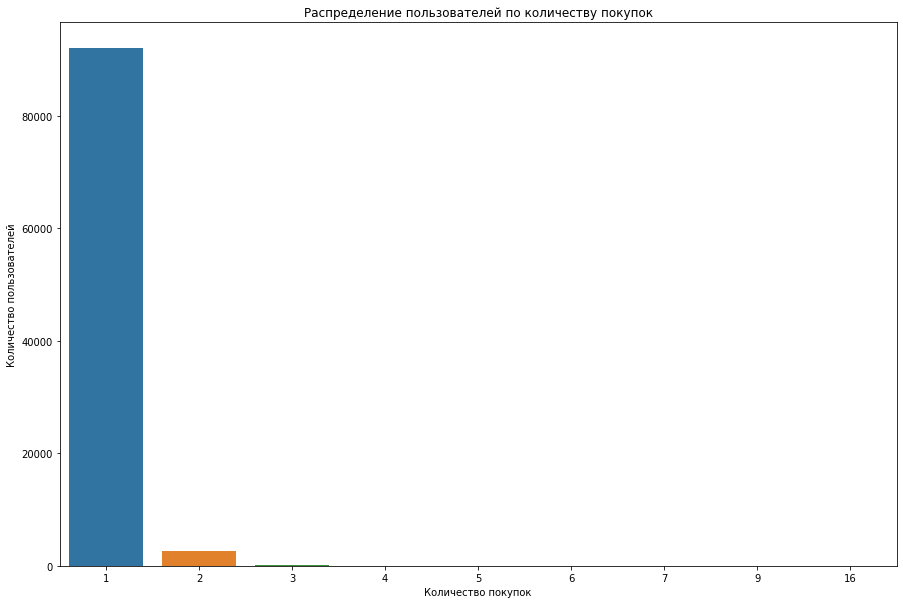

In [28]:
plt.figure(figsize=(15,10))
sns.barplot(x='count_orders', y='count_customers', data=count_orders)
plt.title('Распределение пользователей по количеству покупок')
plt.xlabel('Количество покупок')
plt.ylabel('Количество пользователей');

**Выводы:** Количество пользователей, которые совершили покупку только один раз - 92087.

## 2. Количество заказов в месяц в среднем, которые не доставляются по разным причинам

Отберем заказы, в которых отсутствует время доставки заказа в столбце order_delivered_customer_date.

In [29]:
orders_not_delivered = olist_orders_dataset.query('order_delivered_customer_date == "NaN"')
orders_not_delivered.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07


Не доставлеными будем считать заказы, которые имеют статус canceled и unavailable. В остальных случаях мы не можем сказать, что заказ не был доставлен, так как он может быть на этапе сборки или в пути.

In [30]:
orders_not_delivered = orders_not_delivered.query('order_status ==["canceled","unavailable"]')
orders_not_delivered.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaT,NaT,2018-08-14
586,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaT,NaT,2018-02-16
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaT,2018-02-22
687,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaT,NaT,2017-09-05


Посмотрим какое количество заказов не доставляются в разрезе по статусам.

In [31]:
orders_not_delivered.order_status.value_counts()

canceled       619
unavailable    609
Name: order_status, dtype: int64

Так как у нас в данных есть только полная дата, а нас спрашивают сколько в среднем в месяц не доставляются товары, то нужно создать новый столбец с месяцем. Так как нас интересуют те заказы, которые не были доставлены, то логично будет использовать в качестве даты столбец order_purchase_timestamp — время создания заказа.

In [32]:
orders_not_delivered['month_year'] = orders_not_delivered['order_purchase_timestamp'].dt.strftime('%Y-%m')
orders_not_delivered.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,month_year
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05,2017-11
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaT,NaT,2018-08-14,2018-08
586,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaT,NaT,2018-02-16,2018-01
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaT,2018-02-22,2018-01
687,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaT,NaT,2017-09-05,2017-08


Сгруппируем данные по статусу заказа и месяцу создания заказа. Посчитаем количество заказов. 

In [33]:
count_orders_not_delivered = orders_not_delivered.groupby(['order_status','month_year'],as_index=False)\
                    .agg({'order_id':'count'}).rename(columns = {'order_id':'count_orders'})
count_orders_not_delivered.head()

,order_status,month_year,count_orders
0,canceled,2016-09,2
1,canceled,2016-10,19
2,canceled,2017-01,3
3,canceled,2017-02,17
4,canceled,2017-03,33


Посчитаем среднее количество недоставленных заказов.

In [34]:
round(count_orders_not_delivered['count_orders'].mean(), 2)

27.29

Построим график, где отобразим как меняется количество недоставленных заказов в разные месяцы в зависимости от статуса заказа.

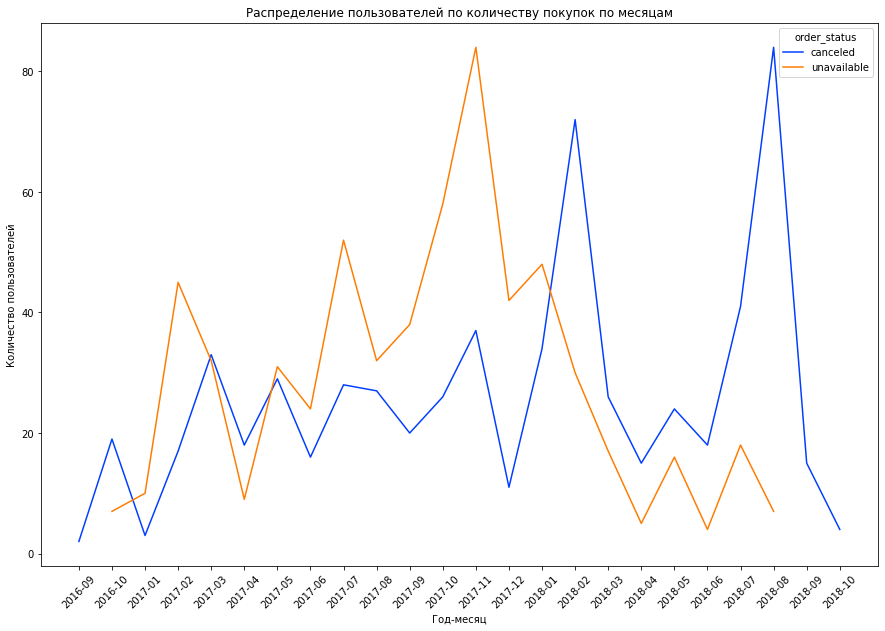

In [35]:
plt.figure(figsize=(15,10))
sns.lineplot(
    x="month_year", 
    y="count_orders",
    data=count_orders_not_delivered,
    palette='bright',
    hue='order_status')
plt.xticks(rotation=45)
plt.title('Распределение пользователей по количеству покупок по месяцам')
plt.xlabel('Год-месяц')
plt.ylabel('Количество пользователей');


Наблюдаем, что пик количества отмененных заказов приходится на октябрь 2017 года, а пик недоступных заказов на февраль и август 2018 года. Возможно в это время случился какой-то сбой. 

Сгруппируем данные еще раз по статусу заказа и посчитаем среднее по количеству заказов.

In [36]:
mean_count_orders_not_delivered = count_orders_not_delivered.groupby('order_status',as_index=False)\
                                                            .agg({'count_orders':'mean'})\
                                                            .rename(columns = {'count_orders':'mean_count'})
mean_count_orders_not_delivered

,order_status,mean_count
0,canceled,25.791667
1,unavailable,29.000000


Округлим среднее до двух знаков после точки.

In [37]:
mean_count_orders_not_delivered['mean_count'] = round(mean_count_orders_not_delivered['mean_count'], 2)
mean_count_orders_not_delivered

,order_status,mean_count
0,canceled,25.79
1,unavailable,29.00


**Выводы:** Количество заказов, которые не были доставлены по причине отмены заказа равняется 25.79 в месяц в среднем, а по причине недоступен - 29.00. 

## 3. По каждому товару определить, в какой день недели товар чаще всего покупается

Воспользуемся способом объединения inner join, при котором объединяются только те значения, которые можно найти в обеих таблицах, так как нам не нужны пропуски в данных. Объединять будем по столбцу order_id.



In [38]:
order_items = olist_order_items_dataset.merge(olist_orders_dataset, how = 'inner', on = 'order_id')
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17


Отфильтруем датафрейм order_items по условиям, которые обосновали в прошлом шаге, чтобы оставить только те заказы, которые считаем покупками.

In [39]:
order_items = order_items.query('order_status != ["canceled","unavailable"] & order_approved_at != "NaN"')
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17


Создадим столбец с днями недели.

In [40]:
order_items['day_week'] = order_items.order_purchase_timestamp.dt.day_name()
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,day_week
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,Wednesday
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,Wednesday
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,Sunday
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,Wednesday
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,Saturday


Создадим таблицу, в которой сгруппируем данные по id продукта и дню недели, посчитаем количество продукта, приходящегося на конкретный день недели. Отсортируем данные по количеству продукта от большего к меньшему.

In [41]:
quantity_product_by_day_week = order_items.groupby(['product_id','day_week'], as_index=False)\
           .agg({'order_item_id':'count'}).sort_values('order_item_id', ascending=False)\
           .rename(columns = {'order_item_id':'count_product'})
quantity_product_by_day_week.head()

,product_id,day_week,count_product
15812,422879e10f46682990de24d770e7f83d,Wednesday,93
36305,99a4788cb24856965c36a24e339b6058,Monday,92
40819,aca2eb7d00ea1a7b8ebd4e68314663af,Thursday,89
40815,aca2eb7d00ea1a7b8ebd4e68314663af,Friday,87
40820,aca2eb7d00ea1a7b8ebd4e68314663af,Tuesday,85


В полученной таблице у нас один и тот же продукт встречается несколько раз, потому что группировка работает еще и по дню недели. А нам интересно узнать в какой день недели каждый из товаров заказывается большее количество раз. Необходимо отставить данные только с наибольшем количеством заказов продукта и тогда мы сможем понять в какой день этот продукт заказывают чаще.

Посчитаем максимальное количество продукта для каждого уникального товара.

In [42]:
quantity_product_max=quantity_product_by_day_week.groupby(['product_id','day_week'], as_index=False)\
                                                 .agg({'count_product':'max'})\
                                                 .rename(columns = {'count_product':'count_product_max'})
quantity_product_max.sort_values('count_product_max', ascending=False).head()

,product_id,day_week,count_product_max
15812,422879e10f46682990de24d770e7f83d,Wednesday,93
36305,99a4788cb24856965c36a24e339b6058,Monday,92
40819,aca2eb7d00ea1a7b8ebd4e68314663af,Thursday,89
40815,aca2eb7d00ea1a7b8ebd4e68314663af,Friday,87
40820,aca2eb7d00ea1a7b8ebd4e68314663af,Tuesday,85


Посмотрим количество уникальных продуктов.

In [43]:
nunique_products = quantity_product_max.product_id.nunique()
print(f'Количество уникальных продуктов: {nunique_products}')

Количество уникальных продуктов: 32726


Можно построить график и посмотреть наглядно в какой день сколько товаров покупается.
Для начала создадим таблицу, в которой сгруппируем данные по дню недели и посчитаем какое количество продукта приходится на каждый из них.

In [44]:
count_product_by_day_week = quantity_product_max.groupby('day_week', as_index=False) \
                                                .agg({'product_id': 'count'})\
                                                .rename(columns={'product_id': 'count_products'})\
                                                .sort_values('count_products')

count_product_by_day_week

,day_week,count_products
2,Saturday,7152
3,Sunday,7674
0,Friday,8745
4,Thursday,8902
6,Wednesday,9411
5,Tuesday,9433
1,Monday,9564


Построим график распределения количества товара от дня недели.

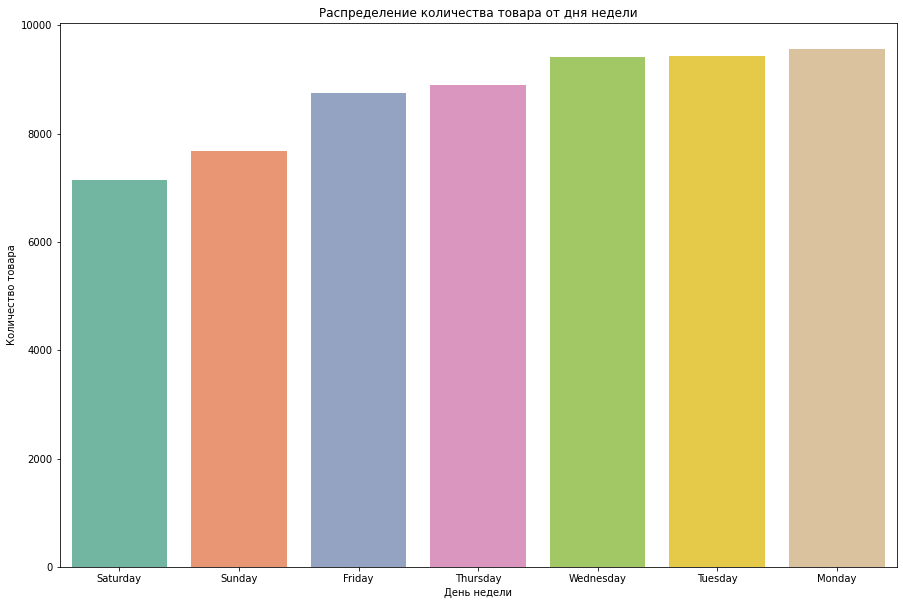

In [45]:
plt.figure(figsize=(15,10))
sns.barplot(x='day_week', y='count_products', data=count_product_by_day_week, palette='Set2')
plt.title('Распределение количества товара от дня недели')
plt.xlabel('День недели')
plt.ylabel('Количество товара');

**Выводы:** Определили по каждому товару, в какой день недели товар чаще всего покупается.

## 4. Среднее количество покупок в неделю (по месяцам) у каждого из пользователей 

Чтобы ответить на данный вопрос будем использовать датафрейм, который мы сделали в первом пункте, в результате  объединения и фильтрации.

Так как при выполнении задания у нас появляется предупреждение SettingWithCopyWarning, будем использовать копию датафрейма customers_purchases.

In [46]:
customers_purchases_copy=customers_purchases.copy(deep=True)

Создадим столбец year_month с месяцем создания заказа.

In [47]:
customers_purchases_copy['year_month'] = customers_purchases_copy['order_purchase_timestamp'].dt.strftime('%Y-%m')
customers_purchases_copy.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,year_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,2018-02


Также не стоит забывать, что внутри месяца может быть не целое количество недель. Создадим столбец count_weeks с количеством недель в месяце.

In [48]:
customers_purchases_copy['count_weeks'] = round(customers_purchases_copy['order_purchase_timestamp'].dt.days_in_month / 7, 2)
customers_purchases_copy.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,year_month,count_weeks
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10,4.43
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,2018-07,4.43
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,2018-08,4.43
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017-11,4.29
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,2018-02,4.00


Создадим новый датафрейм count_purchases_by_weeks. Сгруппируем данные по столбцам customer_unique_id, year_month, count_weeks и посчитаем количество покупок у каждого пользователя в неделю.

In [49]:
count_purchases_by_weeks = customers_purchases_copy.groupby(['customer_unique_id', 'year_month', 'count_weeks'], as_index=False)\
                        .agg({'order_id':'count'}).sort_values('order_id', ascending=False)\
                        .rename(columns = {'order_id':'count_orders'})
count_purchases_by_weeks.head()

,customer_unique_id,year_month,count_weeks,count_orders
7231,12f5d6e1cbf93dafd9dcc19095df0b3d,2017-01,4.43,6
14310,25a560b9a6006157838aab1bdbd68624,2017-04,4.29,4
75857,c8460e4251689ba205045f3ea17884a1,2018-08,4.43,4
23649,3e43e6105506432c953e165fb2acf44c,2018-02,4.00,4
50008,83e7958a94bd7f74a9414d8782f87628,2017-01,4.43,4


Посчитаем среднее количество покупок в неделю по месяцам и внесем получившиеся значения в новый столбец mean_count_purchase.

In [50]:
count_purchases_by_weeks['mean_count_purchase'] = round(count_purchases_by_weeks['count_orders'] / count_purchases_by_weeks['count_weeks'], 2)
count_purchases_by_weeks.head()

,customer_unique_id,year_month,count_weeks,count_orders,mean_count_purchase
7231,12f5d6e1cbf93dafd9dcc19095df0b3d,2017-01,4.43,6,1.35
14310,25a560b9a6006157838aab1bdbd68624,2017-04,4.29,4,0.93
75857,c8460e4251689ba205045f3ea17884a1,2018-08,4.43,4,0.90
23649,3e43e6105506432c953e165fb2acf44c,2018-02,4.00,4,1.00
50008,83e7958a94bd7f74a9414d8782f87628,2017-01,4.43,4,0.90


Можно построить график и посмотреть наглядно среднее количество покупок по месяцам у каждого из пользователей. Для начала создадим таблицу, в которой сгруппируем данные месяцам и посчитаем среднее количество покупок на каждый из них.

In [51]:
count_purchases_by_month = count_purchases_by_weeks.groupby('year_month') \
  .agg({'mean_count_purchase': 'mean'}) \
  .sort_values('year_month').reset_index()

Построим график распределения среднего количества покупок по месяцам у каждого из пользователей.

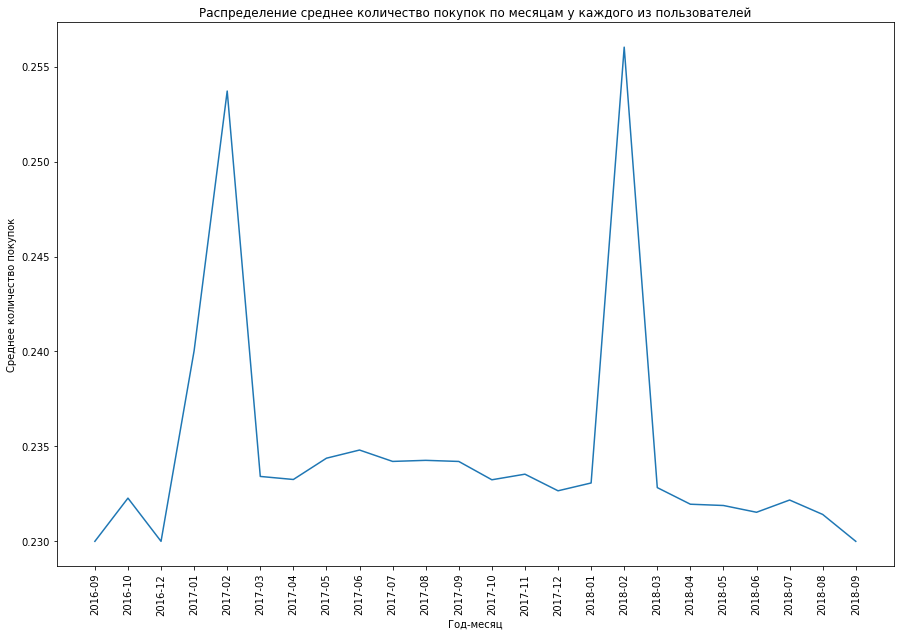

In [52]:
plt.figure(figsize=(15,10))
sns.lineplot(
    x="year_month", 
    y="mean_count_purchase",
    data=count_purchases_by_month)
plt.xticks(rotation=90)
plt.title('Распределение среднее количество покупок по месяцам у каждого из пользователей')
plt.xlabel('Год-месяц')
plt.ylabel('Среднее количество покупок');

Наблюдаем два пика в феврале 2017 и феврале 2018. Так как мы не знаем какой у нас товар, но сюдя по графикам можно предположить, что это как-то связано с мужчинами, нацелено на них и чаще всего совершаются покупки на 23 февраля. 

**Выводы:** Посчитали среднее количество покупок в неделю (по месяцам) у каждого из пользователей.


## 5.1. Когортный анализ пользователей

Сначала узнаем первую и последнюю даты оплат заказов, чтобы узнать весь диапазон, за который были совершены оплаты заказов.

Посчитаем первую дату оплаты заказа.

In [53]:
min_order_approved_at = customers_purchases_copy.order_approved_at.min()
print(f'Первая дата оплаты заказа: {min_order_approved_at}')

Первая дата оплаты заказа: 2016-09-15 12:16:38


Посчитаем последнюю дату оплаты заказа.

In [54]:
max_order_approved_at = customers_purchases_copy.order_approved_at.max()
print(f'Последняя дата оплаты заказа: {max_order_approved_at}')

Последняя дата оплаты заказа: 2018-09-03 17:40:06


В данных у нас встречается диапазон дат от 2016-09-15 до 2018-09-03. Полные данные у нас представлены только за 2017 год, значит работать будем с ними. Но чтобы посмотреть на декабрь 2017 года нужно взять чуть больше данных.

In [55]:
min_date = '2017-01-01'
max_date = '2018-04-01'

Отфильтруем данные, возьмем только те, которые удовлетворяют условиям, т.е. находятся в диапазоне от min_date до max_date в столбце order_approved_at. Датафрейм используем из прошлых пунктов, он уже отфильтрован по тому, что мы считаем покупкой.

In [56]:
customers_purchases_copy = customers_purchases_copy.query('order_approved_at >= @min_date and order_approved_at <= @max_date')
customers_purchases_copy.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,year_month,count_weeks
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10,4.43
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017-11,4.29
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,2018-02,4.00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,80bb27c7c16e8f973207a5086ab329e2,86320,congonhinhas,PR,2017-07,4.43
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09,36edbb3fb164b1f16485364b6fb04c73,98900,santa rosa,RS,2017-04,4.29


Создадим новый датафрейм. Сгруппируем данные по уникальным идентификаторам пользователей и посмотрим на первую дату покупки для каждого пользователя. 

In [57]:
first_order_date = customers_purchases_copy.groupby('customer_unique_id', as_index=False) \
  .agg({'year_month': 'min'}).sort_values('customer_unique_id') \
  .rename(columns={'year_month': 'first_order_month'})

first_order_date.head()

,customer_unique_id,first_order_month
0,0000f46a3911fa3c0805444483337064,2017-03
1,0000f6ccb0745a6a4b88665a16c9f078,2017-10
2,0004aac84e0df4da2b147fca70cf8255,2017-11
3,00053a61a98854899e70ed204dd4bafe,2018-02
4,0005e1862207bf6ccc02e4228effd9a0,2017-03


Объединим столбцы customer_unique_id, order_id, year_month из датафрейма customers_purchases_copy с датафреймом first_order_date по столбцу customer_unique_id.

In [58]:
customers_purchases_first_order_date = customers_purchases_copy[['customer_unique_id', 'order_id', 'year_month']]\
                                                               .merge(first_order_date, how='inner',on='customer_unique_id')
customers_purchases_first_order_date.head()

,customer_unique_id,order_id,year_month,first_order_month
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10,2017-09
1,7c396fd4830fd04220f754e42b4e5bff,69923a4e07ce446644394df37a710286,2017-09,2017-09
2,7c142cf63193a1473d2e66489a9ae977,949d5b44dbf5de918fe9c16f97b45f8a,2017-11,2017-11
3,72632f0f9dd73dfee390c9b22eb56dd6,ad21c59c0840e6cb83a9ceb5573f8159,2018-02,2018-02
4,80bb27c7c16e8f973207a5086ab329e2,a4591c265e18cb1dcee52889e2d8acc3,2017-07,2017-07


Теперь у нас есть датафрейм с уникальными идентификаторами пользователей, уникальными идентификаторами заказа, годом и месяцем покупки заказа и годом и месяцем первой даты покупки.

Посчитаем количество пользователей в разрезе первой даты покупки.

In [59]:
total_customers = customers_purchases_first_order_date.groupby('first_order_month', as_index=False)\
                    .agg({'customer_unique_id':'nunique'})\
                    .rename(columns={'customer_unique_id':'total_count_customers'})
total_customers

,first_order_month,total_count_customers
0,2017-01,751
1,2017-02,1678
2,2017-03,2571
3,2017-04,2326
4,2017-05,3541
5,2017-06,3102
6,2017-07,3823
7,2017-08,4130
8,2017-09,4076
9,2017-10,4393


Сгруппируем данные по дате первой покупки для каждого пользователя и месяцем покупки и посчитаем уникальное количество пользователей.

In [60]:
nunique_count_customers_cohorts = customers_purchases_first_order_date.groupby(['first_order_month', 'year_month'], as_index=False) \
                                              .agg({'customer_unique_id': 'nunique'})\
                                              .rename(columns={'customer_unique_id': 'count_customers_cohorts'})
 
nunique_count_customers_cohorts.head()

,first_order_month,year_month,count_customers_cohorts
0,2017-01,2017-01,751
1,2017-01,2017-02,3
2,2017-01,2017-03,2
3,2017-01,2017-04,1
4,2017-01,2017-05,3


Объеденим таблицы nunique_count_customers_cohorts и total_customers по столбцу first_order_month.

In [61]:
cohorts = nunique_count_customers_cohorts.merge(total_customers, on='first_order_month')
cohorts.head()

,first_order_month,year_month,count_customers_cohorts,total_count_customers
0,2017-01,2017-01,751,751
1,2017-01,2017-02,3,751
2,2017-01,2017-03,2,751
3,2017-01,2017-04,1,751
4,2017-01,2017-05,3,751


Посчитаем долю клиентов, которые продолжают пользоваться товарами и услугами компании в течение определенного периода. 

In [62]:
cohorts['CRR']=round(cohorts['count_customers_cohorts'] / cohorts['total_count_customers'] * 100, 2)
cohorts.head()

,first_order_month,year_month,count_customers_cohorts,total_count_customers,CRR
0,2017-01,2017-01,751,751,100.00
1,2017-01,2017-02,3,751,0.40
2,2017-01,2017-03,2,751,0.27
3,2017-01,2017-04,1,751,0.13
4,2017-01,2017-05,3,751,0.40


Напишем функцию, с помощью которой добавим значение периода когорты.

In [63]:
def cohort_period(df):
    df['cohort_period'] = np.arange(len(df))
    return df

cohorts = cohorts.groupby('first_order_month').apply(cohort_period)

cohorts.head()

,first_order_month,year_month,count_customers_cohorts,total_count_customers,CRR,cohort_period
0,2017-01,2017-01,751,751,100.00,0
1,2017-01,2017-02,3,751,0.40,1
2,2017-01,2017-03,2,751,0.27,2
3,2017-01,2017-04,1,751,0.13,3
4,2017-01,2017-05,3,751,0.40,4


Зададим индексы, используя существующие столбцы.

In [64]:
cohorts.set_index(['first_order_month', 'cohort_period'], inplace=True)
cohorts.head()

year_month  count_customers_cohorts  \
first_order_month cohort_period                                       
2017-01           0                2017-01                      751   
                  1                2017-02                        3   
                  2                2017-03                        2   
                  3                2017-04                        1   
                  4                2017-05                        3   

                                 total_count_customers     CRR  
first_order_month cohort_period                                 
2017-01           0                                751  100.00  
                  1                                751    0.40  
                  2                                751    0.27  
                  3                                751    0.13  
                  4                                751    0.40

## 5.2. Выявить когорту с самым высоким retention на 3-й месяц в период с января по декабрь 

Добавим второй уровень индексов.

In [65]:
retention=cohorts['CRR'].unstack(1)
retention

cohort_period,0,1,2,3,4,5,6,7,8,9,10,11,12,13
first_order_month,,,,,,,,,,,,,,
2017-01,100.0,0.40,0.27,0.13,0.40,0.13,0.40,0.13,0.13,0.40,0.13,0.67,0.40,0.13
2017-02,100.0,0.24,0.30,0.12,0.42,0.12,0.24,0.18,0.06,0.18,0.12,0.30,0.12,0.18
2017-03,100.0,0.51,0.35,0.39,0.35,0.16,0.16,0.31,0.35,0.08,0.39,0.12,0.23,NaN
2017-04,100.0,0.60,0.21,0.17,0.30,0.26,0.34,0.30,0.30,0.17,0.26,0.09,NaN,NaN
2017-05,100.0,0.48,0.48,0.40,0.31,0.34,0.42,0.14,0.25,0.25,0.25,NaN,NaN,NaN
2017-06,100.0,0.45,0.35,0.39,0.26,0.39,0.35,0.23,0.13,0.23,NaN,NaN,NaN,NaN
2017-07,100.0,0.52,0.34,0.24,0.29,0.21,0.31,0.10,0.18,NaN,NaN,NaN,NaN,NaN
2017-08,100.0,0.68,0.34,0.27,0.36,0.53,0.29,0.27,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,100.0,0.69,0.54,0.29,0.44,0.22,0.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Построим тепловую карту распределения CRR для всех когорт.

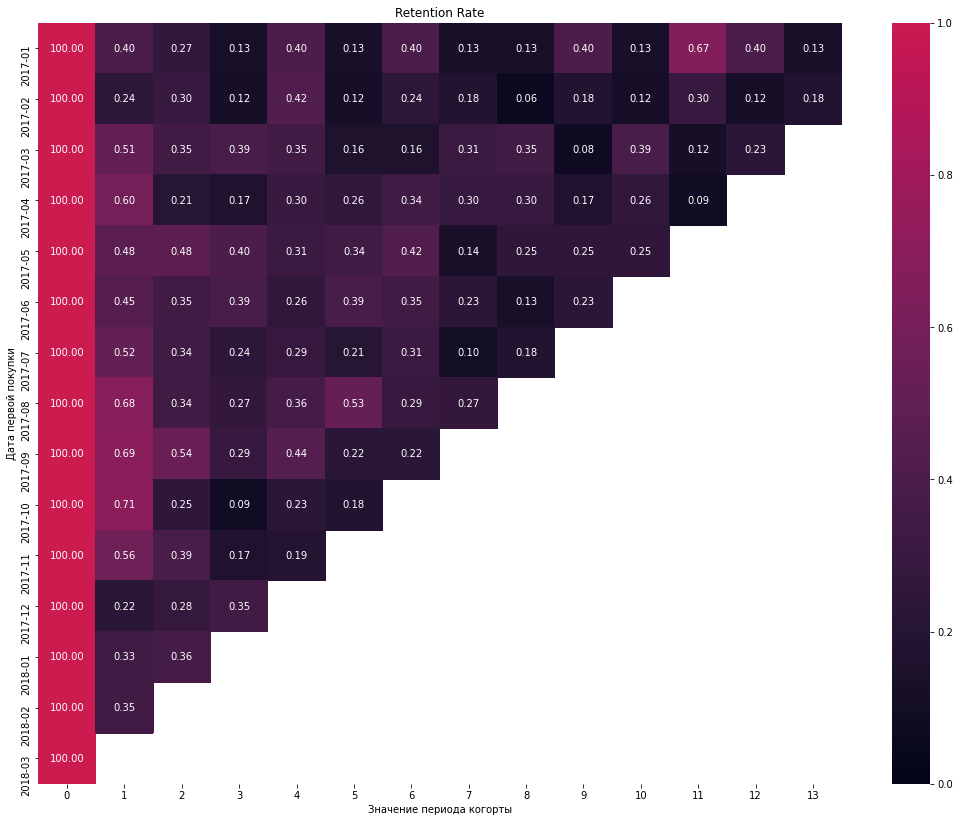

In [66]:
plt.figure(figsize=(18,14))
sns.heatmap(retention, annot=True, cmap ='rocket', vmin=0, vmax=1, center= 1, fmt='.2f')
plt.title('Retention Rate')
plt.ylabel('Дата первой покупки')
plt.xlabel('Значение периода когорты');

**Выводы:** Из тепловой карты видим, что когорта с самым высоким retention на 3-й месяц наблюдается 2017-05 и составляет 0,40. В целом, наблюдаем не особо высокие значения, самые высокие приходятся на время формирования когорт и первые месяцы после. Удержание пользователей низкое.

## Используя python, построить RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию

Часто для качественного анализа аудитории используют подходы, основанные на сегментации. Используя python, построим RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. 

Сегментация покупателей с использованием RFM-анализа.
Для RFM-анализа нам потребуются определенные данные о каждом из клиентов:

R - время от последней покупки пользователя до текущей даты,

F - суммарное количество покупок у пользователя за всё время,

M - сумма покупок за всё время.

Объеденим все три датафрейма вместе.

In [67]:
df_full = olist_orders_dataset.merge(olist_customers_dataset, how = 'inner', on = 'customer_id')\
                              .merge(olist_order_items_dataset, how = 'inner', on = 'order_id')
df_full.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


Отфильтруем данные, оставив только те, которые являются покупками. О том как это делали, написано ранее.

In [68]:
df_full = df_full.query('order_status != ["canceled","unavailable"] & order_approved_at != "NaN"')
df_full.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


Посчитаем первую дату оплаты заказа.

In [69]:
min_order_approved_at = df_full.order_approved_at.min()
print(f'Первая дата оплаты заказа: {min_order_approved_at}')

Первая дата оплаты заказа: 2016-09-15 12:16:38


Посчитаем последнюю дату оплаты заказа.

In [70]:
max_order_approved_at = df_full.order_approved_at.max()
print(f'Последняя дата оплаты заказа: {max_order_approved_at}')

Последняя дата оплаты заказа: 2018-09-03 17:40:06


Так как данные у нас не новые, то за текущую дату будем считать последнюю дату покупки. В датасете последний заказ был сделан 2018-09-03.

In [71]:
now_data = df_full.order_approved_at.max()
now_data

Timestamp('2018-09-03 17:40:06')

Чтобы извлечь эти значения для RFM-анализа, нам понадобятся только следующие столбцы из датасета: customer_unique_id, order_id, order_approved_at и price.

In [72]:
rfm_table = df_full.groupby('customer_unique_id', as_index=False).agg({'order_approved_at': lambda x:(now_data - x.max()).days,
                                                                         'order_id': 'count', 
                                                                         'price': 'sum'})
rfm_table = rfm_table.rename(columns = {'order_approved_at': 'recency',
                            'order_id': 'frequency',
                            'price': 'monetary_value'})

rfm_table.head()

,customer_unique_id,recency,frequency,monetary_value
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,18.90
2,0000f46a3911fa3c0805444483337064,541,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,292,1,180.00


Расчитаем показатели при помощи квинтилей 0.33, 0.66, чтобы посмотреть как можно разбить пользователей по сегментам.

In [73]:
quantiles = rfm_table.quantile(q=[0.33,0.66])
quantiles

,recency,frequency,monetary_value
0.33,152.0,1.0,57.99
0.66,291.0,1.0,124.99


Наблюдаем, что почти для всех квантилей frequency равно единице, что говорит нам о том, что чаще всего пользователи совершают покупку только один раз. 

Не совсем понятно, что происходит с суммарным количеством покупок у пользователя за всё время. Думаю, стоит посмотреть на описательную статистику и принять решение.

Посмотрим на описательную статистику rfm_table.

In [74]:
rfm_table.describe()

,recency,frequency,monetary_value
count,94970.000000,94970.000000,94970.000000
mean,242.475519,1.180225,142.073605
std,152.952043,0.620621,216.085833
min,0.000000,1.000000,0.850000
25%,118.000000,1.000000,47.900000
50%,223.000000,1.000000,89.890000
75%,351.000000,1.000000,155.000000
max,718.000000,24.000000,13440.000000


Разбить пользователей на более точные сегменты нужно вручную (по крайней мере по frequency и monetary_value), так как при использовании метода квинтилей практически у всех сегментов сумарное количество покупок будет равнятся единице, что не совсем верно, и сумма покупок за всё время не будет отображать нужной картины (так как больше 75% данных лежат в промежутке от 0.85 до 155).

### Recency - время от последней покупки пользователя до текущей даты

Напишем функцию, с помощью которой разделим пользователей по времени от последней покупки до текущей даты на ранги.

In [75]:
quantiles = quantiles.to_dict()
# Arguments (x = value, p = recency)
def r_class(x,p,d):
    if x <= d[p][0.33]:
        return 1
    elif x <= d[p][0.66]:
        return 2
    else:
        return 3

Добавим ранги в таблицу rfm_table в столбец r.

In [76]:
rfm_table['r'] = rfm_table.recency.apply(r_class, args=('recency',quantiles,))
rfm_table.head()

,customer_unique_id,recency,frequency,monetary_value,r
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,18.90,1
2,0000f46a3911fa3c0805444483337064,541,1,69.00,3
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,25.99,3
4,0004aac84e0df4da2b147fca70cf8255,292,1,180.00,3


Посмотрим на количество пользователей разбитых на ранги в столбце r.

In [77]:
rfm_table.r.value_counts()

3    32172
1    31516
2    31282
Name: r, dtype: int64

Разделили пользователей на ранги по recency, где:

1 - время от последней покупки пользователя до текущей даты меньше пяти месяцев

2 - время от последней покупки пользователя до текущей даты от пяти до десяти месяцев

3 - время от последней покупки пользователя до текущей даты больше десяти месяцев

### Frequency - суммарное количество покупок у пользователя за всё время

Посмотрим какое количество покупок встречается в таблице.

In [78]:
rfm_table.frequency.unique()

array([ 1,  2,  4,  3,  7,  5,  6, 12, 10,  8, 18, 15,  9, 14, 11, 21, 20,
       13, 16, 24])

Теперь посмотрим на то, как часто встречается разное количество покупок.

In [79]:
rfm_table.frequency.value_counts()

1     83168
2      8948
3      1667
4       629
5       246
6       195
7        46
8        16
9        11
10       11
11       11
12        9
14        3
13        2
15        2
20        2
21        1
16        1
18        1
24        1
Name: frequency, dtype: int64

Разделим пользователей, используя четыре диапазона. 

* пользователи, совершившие одну покупку
* пользователи совершившие две-три покупки
* пользователи совершившие четыре и более покупок

Напишем функцию, с помощью которой разделим пользователей по суммарну количеству покупок за всё время на ранги. 

In [80]:
def f_class(x):
  if x == 1:
    return 3
  elif x == 2 or x == 3:
    return 2
  else:
    return 1

Добавим ранги в таблицу rfm_table в столбец f.

In [81]:
rfm_table['f'] = rfm_table.frequency.apply(lambda x: f_class(x))
rfm_table.head()

,customer_unique_id,recency,frequency,monetary_value,r,f
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90,1,3
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,18.90,1,3
2,0000f46a3911fa3c0805444483337064,541,1,69.00,3,3
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,25.99,3,3
4,0004aac84e0df4da2b147fca70cf8255,292,1,180.00,3,3


Посмотрим на количество пользователей разбитых на ранги в столбце f.

In [82]:
rfm_table.f.value_counts()

3    83168
2    10615
1     1187
Name: f, dtype: int64

Разделили пользователей на ранги по frequency, где:

3 - пользователи, совершившие одну покупку

2 - пользователи совершившие две-три покупки

1 - пользователи совершившие четыре и более покупок

### Monetary_value - сумма покупок за всё время

Напишем функцию, с помощью которой разделим пользователей по сумме покупок за всё время на ранги.

In [83]:
 def m_class(x):
  if x < 50:
    return 3
  elif x >= 50 and x <= 150:
    return 2
  else:
    return 1

Добавим ранги в таблицу rfm_table в столбец m.

In [84]:
rfm_table['m'] = rfm_table.monetary_value.apply(lambda x: m_class(x))
rfm_table.head()

,customer_unique_id,recency,frequency,monetary_value,r,f,m
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90,1,3,2
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,18.90,1,3,3
2,0000f46a3911fa3c0805444483337064,541,1,69.00,3,3,2
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,25.99,3,3,3
4,0004aac84e0df4da2b147fca70cf8255,292,1,180.00,3,3,1


Посмотрим на количество пользователей разбитых на ранги в столбце m.

In [85]:
rfm_table.m.value_counts()

2    43324
3    27461
1    24185
Name: m, dtype: int64

Разделили пользователей на ранги по monetary_value, где:

3 - сумма покупок пользователя за всё время меньше 50

2 - сумма покупок пользователя за всё время от 50 до 150

1 - сумма покупок пользователя за всё время больше 150

Добавим столбец rfmclass, объединив все ранги.

In [86]:
rfm_table['rfmclass'] = rfm_table.r.map(str) \
                            + rfm_table.f.map(str) \
                            + rfm_table.m.map(str)
rfm_table.head()

,customer_unique_id,recency,frequency,monetary_value,r,f,m,rfmclass
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90,1,3,2,132
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,18.90,1,3,3,133
2,0000f46a3911fa3c0805444483337064,541,1,69.00,3,3,2,332
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,25.99,3,3,3,333
4,0004aac84e0df4da2b147fca70cf8255,292,1,180.00,3,3,1,331


Посмотрим уникальные значения столбца rfmclass.

In [87]:
rfm_table['rfmclass'].unique()

array(['132', '133', '332', '333', '331', '131', '221', '232', '233',
       '321', '111', '122', '323', '121', '231', '322', '123', '223',
       '211', '311', '222', '312', '112', '212', '213', '113', '313'],
      dtype=object)

Посмотрим количество уникальных значений столбца rfmclass.

In [88]:
rfm_table['rfmclass'].nunique()

27

Дадим описание классам, по которым будем разбивать наши классы.

* Потерянные - Давно не взаимодействуют с компанией.

* Уходящие - Когда-то были хорошими покупателями.

* Новички - При правильном взаимодействии могут стать постоянными клиентами.

* Спящие - Такие покупатели помнят о компании, когда-то совершали покупки, но сейчас перестали это делать.

* Киты - Взаимодействуют с компанией нерегулярно, но при этом тратят большие суммы.

* Лояльные - Покупатели, которые тратят небольшие деньги, но при этом регулярно делают покупки.

* Стратегически важные клиенты - Они регулярно совершают покупки и пользуются услугами.

Разобъем наши сегменты на более крупные классы, с помощью словаря.

In [89]:
dictionary = {  
   'Потерянные': ['333', '332'],
        
    'Уходящие': ['331', '323', '322', '233'],
      
    'Новички': ['133', '132'],
                                           
    'Спящие': ['312', '313', '222'],
    
    'Киты': ['311', '321', '211', '221', '231'],
    
    'Лояльные': ['113', '123', '212', '213', '223', '232' ],
    
    'Стратегически важные клиенты': ['111', '112', '121', '122', '131'],
    
}

Напишем функцию которая вернет категорию по значению rfmclass.

In [90]:
def segment(rfmclass):
    for segment, items_of_list in dictionary.items():
        for item in items_of_list:
            if item in rfmclass:
                return segment
    return segment

In [91]:
rfm_table['segment'] = rfm_table['rfmclass'].apply(segment)
rfm_table.head()

,customer_unique_id,recency,frequency,monetary_value,r,f,m,rfmclass,segment
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90,1,3,2,132,Новички
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,18.90,1,3,3,133,Новички
2,0000f46a3911fa3c0805444483337064,541,1,69.00,3,3,2,332,Потерянные
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,25.99,3,3,3,333,Потерянные
4,0004aac84e0df4da2b147fca70cf8255,292,1,180.00,3,3,1,331,Уходящие


Объеденим таблицы, для построения графиков.

In [92]:
df_full_segment = df_full.merge(rfm_table, on='customer_unique_id')
df_full_segment.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,price,freight_value,recency,frequency,monetary_value,r,f,m,rfmclass,segment
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,29.99,8.72,336,2,65.38,3,2,2,322,Уходящие
1,69923a4e07ce446644394df37a710286,31f31efcb333fcbad2b1371c8cf0fa84,delivered,2017-09-04 11:26:38,2017-09-04 11:43:25,2017-09-04 21:22:15,2017-09-05 19:20:20,2017-09-15,7c396fd4830fd04220f754e42b4e5bff,3149,...,35.39,8.72,336,2,65.38,3,2,2,322,Уходящие
2,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,118.70,22.76,39,1,118.70,1,3,2,132,Новички
3,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,159.90,19.22,26,1,159.90,1,3,1,131,Стратегически важные клиенты
4,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,...,45.00,27.20,288,1,45.00,2,3,3,233,Уходящие


### Проведение анализа показателей сегментов покупателей

Создадим таблицу, в которой отобразим количество заказов и средний чек в каждом сегменте.

In [93]:
grouped_segment = df_full_segment.groupby('segment').agg({'order_id':'nunique', 'price':'sum',\
                                                    'customer_unique_id': 'nunique'})\
                                                    .rename(columns = {'order_id': 'count_orders', \
                                                                       'customer_unique_id':'count_customers'})\
                                                    .reset_index()
grouped_segment['mean_cheсk'] = (grouped_segment['price']/grouped_segment['count_orders']).round(2)
grouped_segment

,segment,count_orders,price,count_customers,mean_cheсk
0,Киты,10853,3283682.56,9628,302.56
1,Лояльные,13499,1233834.59,13404,91.40
2,Новички,21391,1493053.40,21391,69.80
3,Потерянные,21820,1473596.87,21820,67.53
4,Спящие,1991,164954.56,1642,82.85
5,Стратегически важные клиенты,10919,3077507.18,9751,281.85
6,Уходящие,17712,2766101.15,17334,156.17


Построим график распределения количества заказов по сегментам покупателей.

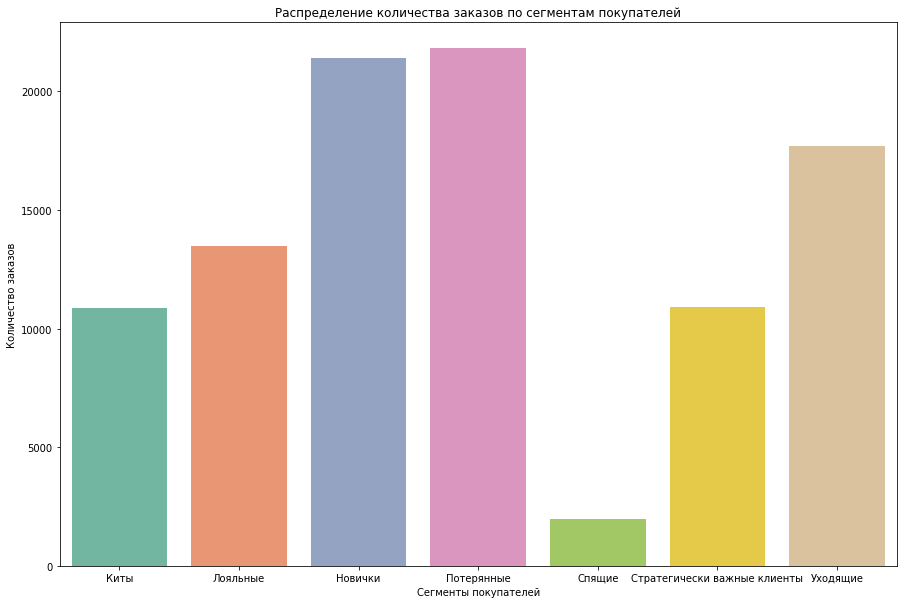

In [94]:
plt.figure(figsize=(15,10))
sns.barplot(
    x="segment", 
    y="count_orders",
    data=grouped_segment,
    palette='Set2')
plt.title('Распределение количества заказов по сегментам покупателей')
plt.xlabel('Сегменты покупателей')
plt.ylabel('Количество заказов');

Самое большое количество заказов у потерянных, уходящих и новичков. Самое маленькое у спящих.

Построим график распределения среднего чека по сегментам покупателей.

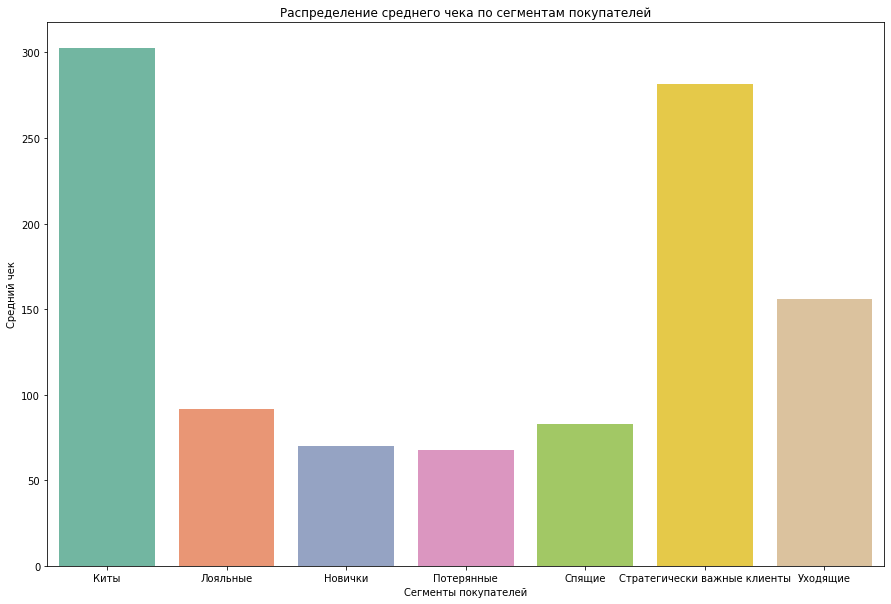

In [95]:
plt.figure(figsize=(15,10))
sns.barplot(
    x="segment", 
    y="mean_cheсk",
    data=grouped_segment,
    palette='Set2')
plt.title('Распределение среднего чека по сегментам покупателей')
plt.xlabel('Сегменты покупателей')
plt.ylabel('Средний чек');

Самый большой средний чек у китов и стратегически важных клиентов. Исходя из графиков, считаю, что раздедлили на сегменты верно.

Посмотрим распределение продаж разных сегментов покупателей по месяцам.

Добавим в датафрейм df_full_segment столбец year_month.

In [96]:
df_full_segment['year_month'] = df_full_segment['order_approved_at'].dt.strftime('%Y-%m')
df_full_segment.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,freight_value,recency,frequency,monetary_value,r,f,m,rfmclass,segment,year_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,8.72,336,2,65.38,3,2,2,322,Уходящие,2017-10
1,69923a4e07ce446644394df37a710286,31f31efcb333fcbad2b1371c8cf0fa84,delivered,2017-09-04 11:26:38,2017-09-04 11:43:25,2017-09-04 21:22:15,2017-09-05 19:20:20,2017-09-15,7c396fd4830fd04220f754e42b4e5bff,3149,...,8.72,336,2,65.38,3,2,2,322,Уходящие,2017-09
2,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,22.76,39,1,118.70,1,3,2,132,Новички,2018-07
3,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,19.22,26,1,159.90,1,3,1,131,Стратегически важные клиенты,2018-08
4,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,...,27.20,288,1,45.00,2,3,3,233,Уходящие,2017-11


Создадим таблицу, в которой отобразим как распределяются продажи разных сегментов покупателей по месяцам.

In [97]:
sales_of_different_segment = df_full_segment.groupby(['segment', 'year_month'])\
.agg({'price':'sum'})\
.reset_index().sort_values('year_month', ascending=True)
sales_of_different_segment.head(10)

,segment,year_month,price
91,Уходящие,2016-09,134.97
0,Киты,2016-10,6054.13
92,Уходящие,2016-10,25681.62
69,Стратегически важные клиенты,2016-10,366.69
52,Спящие,2016-10,253.50
40,Потерянные,2016-10,12224.25
93,Уходящие,2016-12,10.90
1,Киты,2017-01,20212.13
94,Уходящие,2017-01,65308.13
70,Стратегически важные клиенты,2017-01,769.48


Построим график распределения продаж разных сегментов покупателей по месяцам.

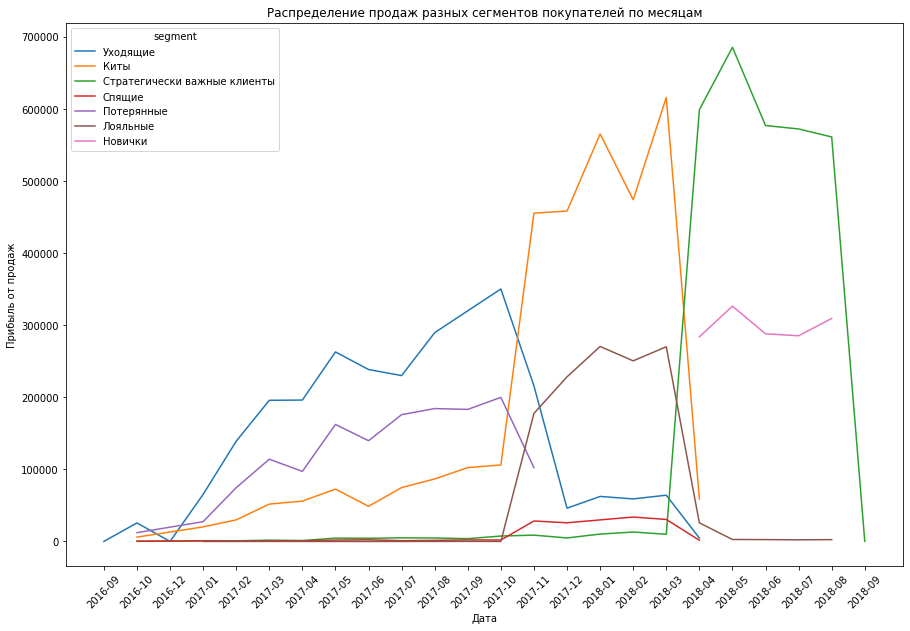

In [98]:
plt.figure(figsize=(15,10))
sns.lineplot(
    x="year_month", 
    y="price",
    data=sales_of_different_segment,
    hue='segment')
plt.xticks(rotation=45)
plt.title('Распределение продаж разных сегментов покупателей по месяцам')
plt.xlabel('Дата')
plt.ylabel('Прибыль от продаж');


**Выводы:** Считаю, что распределение на сегменты сделано правильно, так как прибыль от продаж уходящиего сегмента резко начали падать и закончились в апреле 2018. Прибыль от продаж потерянного сегмента заканчиваются в ноябре 2017. У сегмента киты прибыль от продаж большая, но покупики данный сегмент совершает нестабильно. Лояльные клиенты тратят небольшие суммы еа покупки, но зато покупают постоянно. Самыми ценными является сегмент стратигически важных клиентов, так как прибыль от продаж неплохая и клиенты делают постоянные покупки.